# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [9]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=False)

def dqn(n_episodes=1, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train_mode=True, 
        ckpt_path='pth_checkpoints/checkpoint.pth'):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    moving_avgs = []                   # list of moving averages
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                      # select an action
            env_info = env.step(action)[brain_name]             # send action to environment
            next_state = env_info.vector_observations[0]        # get next state
            reward = env_info.rewards[0]                        # get reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learning step
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)          # save most recent score to window
        scores.append(score)                 # save most recent score to total
        moving_avg = np.mean(scores_window)  # calculate moving average
        moving_avgs.append(moving_avg)       # save most recent moving average
        eps = max(eps_end, eps_decay*eps)    # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg))
        if moving_avg >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avg))
            if train_mode:
                torch.save(agent.qnetwork_local.state_dict(), ckpt_path)
            break
    return scores, moving_avgs


#### 4.1 Standard DQN + replay buffer (no double, no dueling)

Episode 100	Average Score: 0.77
Episode 200	Average Score: 4.36
Episode 300	Average Score: 7.85
Episode 400	Average Score: 11.49
Episode 482	Average Score: 13.02
Environment solved in 382 episodes!	Average Score: 13.02


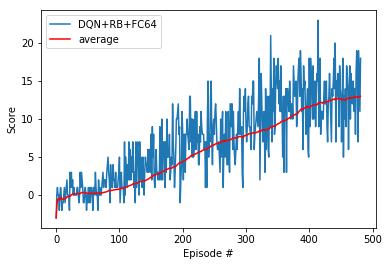

In [12]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.995, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v1.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 2.74
Episode 200	Average Score: 7.22
Episode 300	Average Score: 9.60
Episode 381	Average Score: 13.00
Environment solved in 281 episodes!	Average Score: 13.00


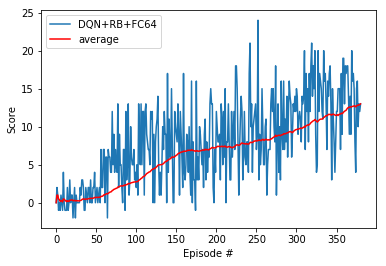

In [13]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.98, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v2.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 4.84
Episode 200	Average Score: 9.65
Episode 300	Average Score: 12.93
Episode 302	Average Score: 13.05
Environment solved in 202 episodes!	Average Score: 13.05


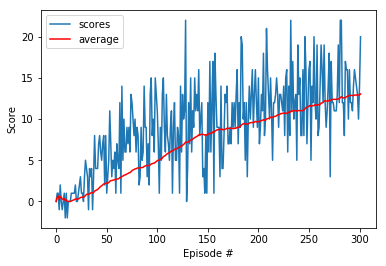

In [8]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.97, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v3.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 2.83
Episode 200	Average Score: 6.78
Episode 300	Average Score: 10.48
Episode 400	Average Score: 11.85
Episode 475	Average Score: 14.01
Environment solved in 375 episodes!	Average Score: 14.01


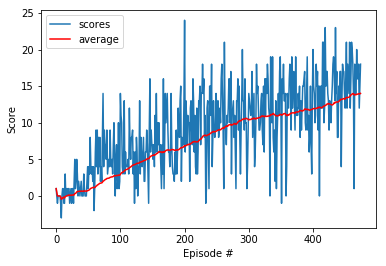

In [11]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.97, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v3_5.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 1.81
Episode 200	Average Score: 7.42
Episode 300	Average Score: 12.12
Episode 338	Average Score: 13.00
Environment solved in 238 episodes!	Average Score: 13.00


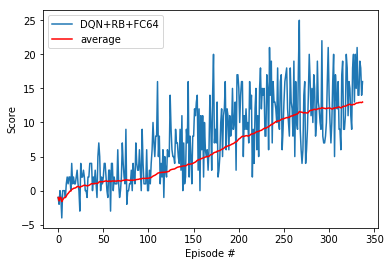

In [15]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.95, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v4.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 2.71
Episode 200	Average Score: 7.90
Episode 300	Average Score: 10.95
Episode 377	Average Score: 13.03
Environment solved in 277 episodes!	Average Score: 13.03


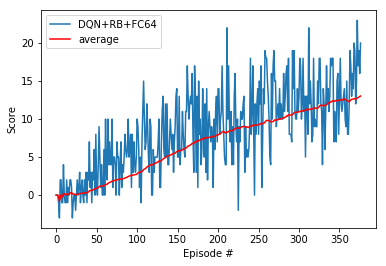

In [16]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.965, eps_end=0.02, ckpt_path='pth_checkpoints/checkpoint_v5.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

#### 4.2 DQN Agent with Dueling

Episode 100	Average Score: 0.59
Episode 200	Average Score: 4.96
Episode 300	Average Score: 8.56
Episode 400	Average Score: 11.65
Episode 426	Average Score: 13.01
Environment solved in 326 episodes!	Average Score: 13.01


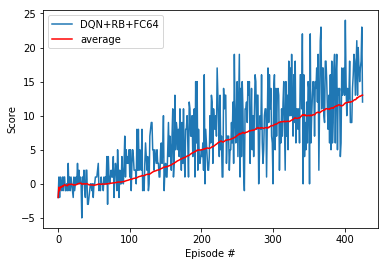

In [17]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=True, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.97, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v6.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 1.15
Episode 200	Average Score: 6.14
Episode 300	Average Score: 9.63
Episode 400	Average Score: 12.55
Episode 408	Average Score: 13.01
Environment solved in 308 episodes!	Average Score: 13.01


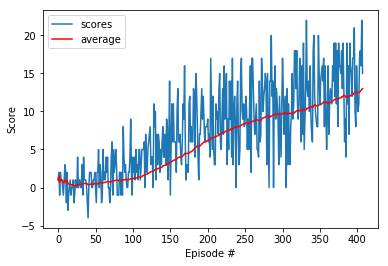

In [18]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=True, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.98, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v7.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 2.47
Episode 200	Average Score: 9.04
Episode 300	Average Score: 11.10
Episode 378	Average Score: 13.08
Environment solved in 278 episodes!	Average Score: 13.08


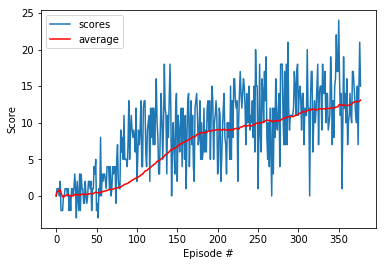

In [19]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=True, use_double=False)
scores, avgs = dqn(n_episodes=600, eps_decay=0.98, eps_end=0.05, ckpt_path='pth_checkpoints/checkpoint_v8.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

#### 4.3 Double-QNet Agent with Dueling

Episode 100	Average Score: 0.51
Episode 200	Average Score: 6.52
Episode 300	Average Score: 9.68
Episode 391	Average Score: 13.00
Environment solved in 291 episodes!	Average Score: 13.00


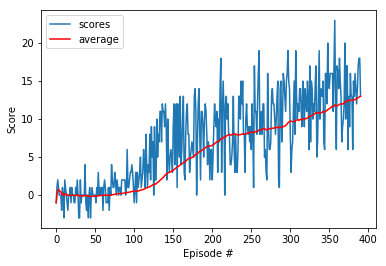

In [21]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=True, use_double=True)
scores, avgs = dqn(n_episodes=600, eps_decay=0.98, eps_end=0.05, ckpt_path='pth_checkpoints/checkpoint_v9.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 0.13
Episode 200	Average Score: 2.27
Episode 300	Average Score: 6.71
Episode 400	Average Score: 10.73
Episode 447	Average Score: 13.03
Environment solved in 347 episodes!	Average Score: 13.03


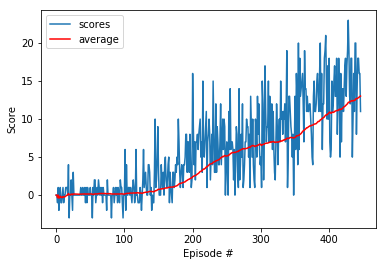

In [22]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=True, use_double=True)
scores, avgs = dqn(n_episodes=600, eps_decay=0.98, eps_end=0.02, ckpt_path='pth_checkpoints/checkpoint_v10.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 1.25
Episode 200	Average Score: 7.78
Episode 300	Average Score: 11.69
Episode 344	Average Score: 13.03
Environment solved in 244 episodes!	Average Score: 13.03


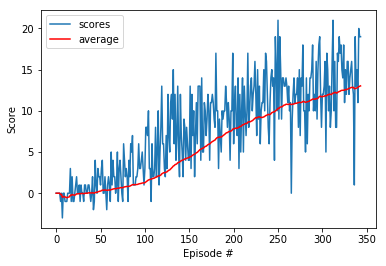

In [24]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=True, use_double=True)
scores, avgs = dqn(n_episodes=600, eps_decay=0.99, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v10.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

#### 4.4 Double-QNet Agent without Dueling

Episode 100	Average Score: 1.27
Episode 200	Average Score: 7.09
Episode 300	Average Score: 9.93
Episode 400	Average Score: 12.10
Episode 425	Average Score: 13.04
Environment solved in 325 episodes!	Average Score: 13.04


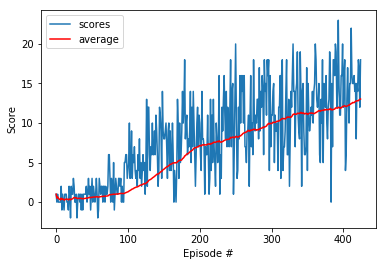

In [10]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=True)
scores, avgs = dqn(n_episodes=600, eps_decay=0.99, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v14.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 100	Average Score: 0.83
Episode 200	Average Score: 4.92
Episode 300	Average Score: 11.27
Episode 400	Average Score: 12.81
Episode 406	Average Score: 13.00
Environment solved in 306 episodes!	Average Score: 13.00


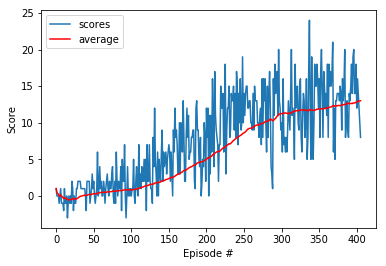

In [11]:
# run the training loop
agent = Agent(state_size=37, action_size=4, seed=0,use_dueling=False, use_double=True)
scores, avgs = dqn(n_episodes=600, eps_decay=0.99, eps_end=0.01, ckpt_path='pth_checkpoints/checkpoint_v17.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

### 5. Testing the agent

Episode 1	Average Score: 18.00
Episode 2	Average Score: 16.50
Episode 3	Average Score: 18.00
Episode 4	Average Score: 18.25
Episode 5	Average Score: 18.40
Episode 6	Average Score: 18.33
Episode 7	Average Score: 18.86
Episode 8	Average Score: 18.50
Episode 9	Average Score: 18.00
Episode 10	Average Score: 17.70


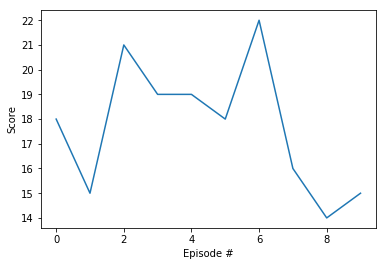

In [12]:
## Test the saved agent

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# load the weights from file
checkpoint = 'pth_checkpoints/checkpoint_v3_5.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 1	Average Score: 20.00
Episode 2	Average Score: 20.00
Episode 3	Average Score: 18.33
Episode 4	Average Score: 16.50
Episode 5	Average Score: 15.40
Episode 6	Average Score: 15.67
Episode 7	Average Score: 15.57
Episode 8	Average Score: 13.88
Episode 9	Average Score: 12.89
Episode 10	Average Score: 12.00


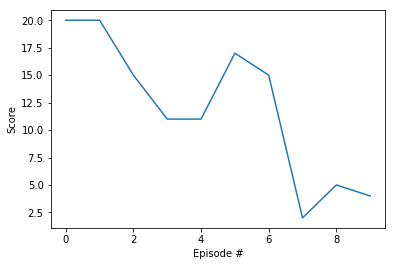

In [13]:
## Test the saved agent

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# load the weights from file
checkpoint = 'pth_checkpoints/checkpoint_v3.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()